# 1. Machine Learning Gladiator

## Our Task
We should take out-of-the-box models and apply them to different datasets. With this approach we attach different goals:
- Learn how to build up intuition for model-to-problem fit -> Learn by action.
- Learn how to build prototypes of models quickly.
- Learn the workflow of model building (Importing data, cleaning data, splitting data, split it into train/test or cross-validation sets, pre-processing, transformations, feature engineering).

We should practice regression, classification and clustering algorithms.

I will use Python 3 and sklearn (plus numpy and pandas) to build up different machine learning models. I will introduce the intention of the out-of-the-box models
briefly. 

## Classification

Classification is beside regression one of the most popluar supervised learning tasks. Supervised learning refers to the problem of learning from labeled data (e.g. photos who are labeled with the person who is in the photo). In the following we will analyse the [adult data set](http://archive.ics.uci.edu/ml/datasets/Adult) and build models with different machine learning algorithms which can predict if an adult incomes is more or less equal 50,000$.

First, lets import some libaries we need.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

Let us import and look at the data.

In [2]:
data_raw = pd.read_csv('data/adult.data.txt')
data_raw.head(20)

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Let look at the numerical feature of the data set.

In [3]:
print(data_raw.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


We also have many features who are based on strings instead of integers or floating point numbers. We are dealing with categorical features (like sex: male/female and relationship: not-in-family, husband, wife etc...).  That is a problem, because the most classfier can not handle categorical features native. Therefore we have to replace them with numerical feature values like integers. 

In [4]:
from numpy import unique

def category_to_numerical(column):
    categories = unique(column).tolist() # finding out all categorical features
    features = []
    for category in column:
        numercial_value =  categories.index(category) # use the index as a new numerical value
        features.append(numercial_value)
    return features

for column in data_raw.columns:
    if not np.issubdtype(data_raw[column].dtype, np.number):
        data_raw[column] = pd.DataFrame({column: category_to_numerical(data_raw[column])})

data_raw.head()

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


Let's beginn to split the raw data in features and labels and train and test set and take a machine learning algorithm to train a model.

In [5]:
def split_features_labels(data):
    labels = data['income']
    features = data.drop('income',axis=1)
    return features, labels

def split_train_test(features, labels, test_size):
    total_test_size = int(len(features) * test_size)
    train_features = features[total_test_size:]
    train_labels = labels[total_test_size:]
    test_features = features[:total_test_size]
    test_labels = labels[:total_test_size]
    return train_features, train_labels, test_features, test_labels

In [6]:
features, labels = split_features_labels(data_raw)
train_features, train_labels, test_features, test_labels = split_train_test(features, labels, 0.15)

In [7]:
print('Train set length:',len(train_features))
print('Test set length:',len(test_features))

Train set length: 27677
Test set length: 4884


I have created a test set which contains 15% of the total data set. With the train set we train our machine learning algorithm and create a model. With the test set we are testing the accuracy on new data of our build machine learning model.

### Decision Tree

I will use a decision tree to build our first prototype model. A decision tree learn from the data by figuring out 'if else' rules from the features to predict the label. E.g. our decision tree based model will most likely find out that people with a higher education earn more money than people with a lower education. In specific our model does not understand what PhD or Bachelor means, but he will see that the people who have a PhD more likely earn over 50k than people with a lower education (bachelor). Based on this information the machine learning algorithm will build a decision tree model that can predicit people incomes based on prior experience.

I will use the decision tree classifier from sklearn to build a machine learning model.

In [8]:
from sklearn import tree
from time import time

decision_tree_classifier = tree.DecisionTreeClassifier()

t_start = time()
decision_tree_classifier.fit(train_features, train_labels) # Actually learning process is here
print('Finished building machine learning model. Training time:', round(time()-t_start, 3), 's')

Finished building machine learning model. Training time: 0.105 s


Let's look at the accuracy of our build model.

In [9]:
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(decision_tree_classifier.predict(test_features), test_labels))

Accuracy:  0.806511056511


### Support Vector Machine (SVM)

Next let's use a Support Vector Machine (SVM) to build our next protoype model. The idea of Support Vector Machines is simple: The algorithm creates a line which separates the classes in case e.g. in a classification problem. The goal of the line is to maximizing the margin between the points on either side of the so called decision line. The benefit of this process is, that after the separation, the model can easily guess the target classes (labels) for new cases.

![](https://i2.wp.com/lasseschultebraucks.com/wp-content/uploads/2017/09/Support_vector_machine-1.jpg?w=719&ssl=1)

If you are more interested in Support Vector Machines and how they work, you can find [a whole blog post about Support Vector Machines on my blog.](https://lasseschultebraucks.com/support-vector-machines/)

In [10]:
from sklearn import svm

svm_classifier = svm.SVC()

t_start = time()
svm_classifier.fit(train_features, train_labels)
print('Finished building machine learning model. Training time:', round(time()-t_start, 3), 's')

Finished building machine learning model. Training time: 126.255 s


Again, let's look at the accuracy of the machine learning model.

In [11]:
print("Accuracy: ", accuracy_score(svm_classifier.predict(test_features), test_labels))

Accuracy:  0.757985257985


### Gaussian Naive Bayes

Last but not least let's take a third classification algorithm. I also have a whole blog post about the [Gaussian Naive Bayes](http://lasseschultebraucks.com/gaussian-naive-bayes), so I do not won't to go into details here. Feel free to check out my blog post to jump more into details.

In [12]:
from sklearn.naive_bayes import GaussianNB

gaussian_nb_classifier = GaussianNB()

t_start = time()
gaussian_nb_classifier.fit(train_features, train_labels)
print('Finished building machine learning model. Training time:', round(time()-t_start, 3), 's')

Finished building machine learning model. Training time: 0.022 s


Again, let's look at the accuracy of the machine learning model.

In [13]:
print("Accuracy: ", accuracy_score(gaussian_nb_classifier.predict(test_features), test_labels))

Accuracy:  0.792383292383


## Regression

Next there is Regression, another supervsied learning strategy. The difference to the classification approach is, that regression concentrates on predicting a quantity instead of classes that can be categorized.
Again, let's jump into an example and explore how regression works in detail.

As an example dataset we take a data set about red wine quality. Our task is it to predict the quality of a wine which is measured by score between 0 and 10 by using features like fixied acidity, density and pH.

In [14]:
import pandas as pd
import numpy as np
import sklearn as sk
# Seperators are semicolons instread of commas
wine_data_raw = pd.read_csv('data/winequality-red.csv', sep=';')
wine_data_raw.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [15]:
print(wine_data_raw.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

The data set looks fine. No further data cleaning and preprocessing is needed. 
Let's go one step further and split the data into features/labels and training/test set.

In [16]:
def split_wine_features_labels(wine_data): 
    labels = wine_data['quality']
    features = wine_data.drop('quality',axis=1)
    return features, labels

def split_train_test(features, labels, test_size):
    total_test_size = int(len(features) * test_size)
    train_features = features[total_test_size:]
    train_labels = labels[total_test_size:]
    test_features = features[:total_test_size]
    test_labels = labels[:total_test_size]
    return train_features, train_labels, test_features, test_labels

In [17]:
features, labels = split_wine_features_labels(wine_data_raw)
train_features, train_labels, test_features, test_labels = split_train_test(features, labels, 0.15)

In [18]:
print('Train set length:',len(train_features))
print('Test set length:',len(test_features))

Train set length: 1360
Test set length: 239


I will use again 15% of the original data set to test my data set for new data inputs.

Now we can look at some regression algorithm and beginn building regressions models.

### Linear Regression
One of the most popular regression analyse techniques is linear regression. Linear regression tries to model a relationship between one scalar dependet variable y and one or more independet variables x.

In [19]:
from sklearn.linear_model import LinearRegression
from time import time

linear_regression_model = LinearRegression()

t_start = time()
linear_regression_model.fit(features, labels)
print('Finished building machine learning model. Training time:', round(time()-t_start, 3), 's')

Finished building machine learning model. Training time: 0.02 s


In regression there are various metrics to tell how accurate a model is. It is a little bit difficult in comparising to classification, because in classification there are categorizes like cat and dog, which are two different type of animals and can not be compared like quantitys. They are either equal or not equals. In regression you try to predict as best as you can and therefore 13.35 is better than 13.3 if the real value is 13.37. 

In following we will you the root-mean-square-error (RMSE) to determine the accuracy of the linear regression model. The RMSE looks at the difference of the predicted and known values and represents the sample standard deviation of the calulated difference. 

In [20]:
def accuracy_rmse(true_values, predicted_values):
    n = len(true_values)
    residuals = 0
    for i in range(n):
        residuals += (true_values[i] - predicted_values[i])**2
    return np.sqrt(residuals/n)

print("Accuracy: ", accuracy_rmse(linear_regression_model.predict(test_features), test_labels))

Accuracy:  0.619558608273


### Other Regression Models
Linear regression is often times not the best way because of its simplicity. Therefore we often need more complex models. Fortunaly many classification, like Support Vector Machines techniques can also be applied to regression problems. To demonstrate, let's use Support Vector Machines to build a regression model.

In [21]:
from sklearn.svm import SVR

svr_model = SVR()

t_start = time()
svr_model.fit(features, labels)
print('Finished building machine learning model. Training time:', round(time()-t_start, 3), 's')

Finished building machine learning model. Training time: 0.222 s


Let's quickly check the accuracy.

In [22]:
print("Accuracy: ", accuracy_rmse(svr_model.predict(test_features), test_labels))

Accuracy:  0.424156171385


Actually Support Vector Machines turns out be a much worser choice than Linear Regression.

Anyway, the mentioned examples should have made clear that beside classification there is also regression in supervised learning. 
Regression can predict a quantity, classification can predict a categorization.

## Clustering

Beside supervised learning technqiues (like classification and regression) there are also unsupervised learning.

One example is clustering (cluster analysis). A clustering problem contains unlabeled data and your task is it to group the data entries in cluster groups. 

![](https://upload.wikimedia.org/wikipedia/commons/c/c8/Cluster-2.svg)
Above there is shown the result of a cluster analysis shown as the coloring of the squares into three clusters.

Beside unsupervsied learning clustering can also be used for supervised learning techniques, but in the following example I will use clustering to demonstrate unsupervised learning.


As an example I will use the iris data set. The iris data set is a very popular data set for showing how classification works, but I will use the data set without the label to create clusters.

In [23]:
from time import time
import numpy as np
from sklearn.datasets import load_iris

iris_data_set = load_iris()

In [24]:
features = iris_data_set.data

In [25]:
# Features: sepal length in cm, sepal width in cm, petal length in cm, petal width in cm\n
features.view()

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

### KMeans

The KMeans algorithm seperate data entries in n groups groups of equal variance. It uses inerita which is the within cluster sum--of-squares.

[Check out the describiton of sklearn to learn more about the KMean algorithm.](http://scikit-learn.org/stable/modules/clustering.html#k-means)

In [26]:
from sklearn.cluster import KMeans

iris_kmeans_estimator = KMeans(n_clusters=3) 

In [27]:
t_start = time()
iris_kmeans_estimator.fit(features)
print('Finished building machine learning model. Training time:', round(time()-t_start, 3), 's')

Finished building machine learning model. Training time: 0.03 s


In [28]:
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(iris_kmeans_estimator.labels_, iris_data_set.target))

Accuracy:  0.0933333333333


In [29]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

labels = iris_kmeans_estimator.labels_

ax.scatter(features[:, 3], features[:, 0], features[:, 2],
           c=labels.astype(np.float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Clustering of the iris data set with KMeans')
ax.dist = 12

fig.show()

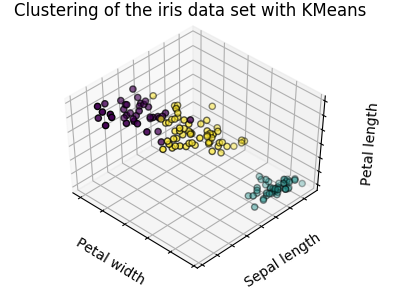

## Summary

- There is supervised and unsupervsied learning
- Supervised learning occupys about labeled data
    - Classification is all about sorting data entries into categories
    - Regression is all about quantifying data entries
- Unsupervsied learning occupy about unlabeled data
    - Clustering is all about creating groups out of a data set
- Before traing a machine learning model, you have to do serveral things (importing data, cleaning data, splitting data intro train/test sets, pre-processing, transformations and feature engineering)
- The accuracy of a machine learning model can be measured by test set and metrics like root-mean-square-error (RMSE)